In [1]:
!pip install PIL
!pip install opencv-python
!pip install --upgrade tensorflow

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorb

In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

In [3]:
size = (128,128)
def preprocess_image(image, target_size = size):
    resized_image = image.resize(target_size)
    image_array = np.array(resized_image)
    if image_array.dtype == np.uint8:
        image_array = image_array.astype(np.float32) / 255.0
    return image_array

In [4]:
def jpg_to_array(folder_path, target_size= size):
    image_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            preprocessed_image = preprocess_image(image, target_size)
            image_list.append(preprocessed_image)
    return np.array(image_list)

In [48]:
true_path = "/content/drive/MyDrive/archive (13)/Fire-Detection/1"
false_path = "/content/drive/MyDrive/archive (13)/Fire-Detection/0"
target_size = size
true_data = jpg_to_array(true_path, target_size)
false_data = jpg_to_array(false_path, target_size)
np.random.seed(1)
combined_array = np.concatenate((true_data, false_data), axis=0)
indices = np.random.permutation(len(combined_array))
combined_array = combined_array[indices]


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
true_labels = np.ones(len(true_data))
false_labels = np.zeros(len(false_data))
combined_labels = np.concatenate((true_labels, false_labels), axis=0)
combined_labels = combined_labels[indices]
print(combined_labels.shape)
print(combined_labels[0])

(774,)
0.0


In [50]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(combined_array, combined_labels, test_size=0.2)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (619, 128, 128, 3)
Train labels shape: (619,)
Test images shape: (155, 128, 128, 3)
Test labels shape: (155,)


<ipython-input-51-ac28e020043f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', palette='viridis')


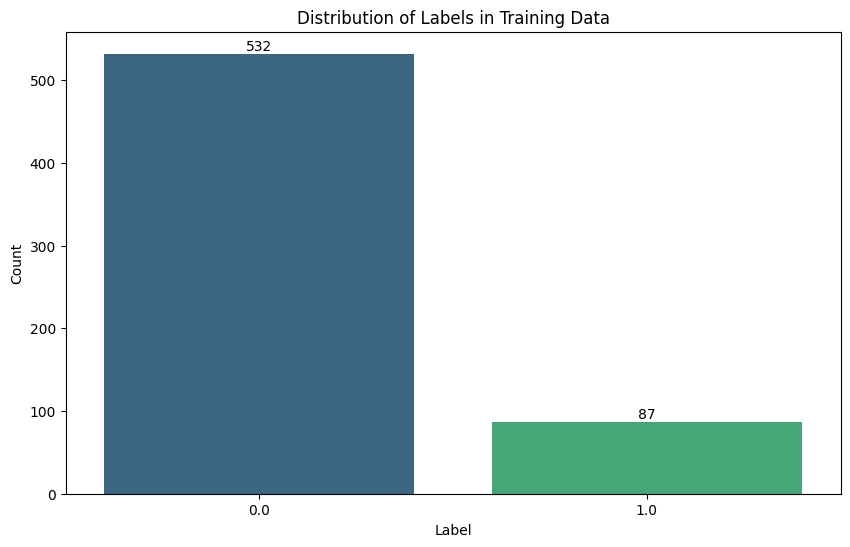

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Combine the train labels into a DataFrame
train_df = pd.DataFrame({'label': train_labels})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='label', palette='viridis')
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Annotate each bar with its count value
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()


<ipython-input-52-5bd725ee8a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', palette='viridis')  # Adjust palette as desired


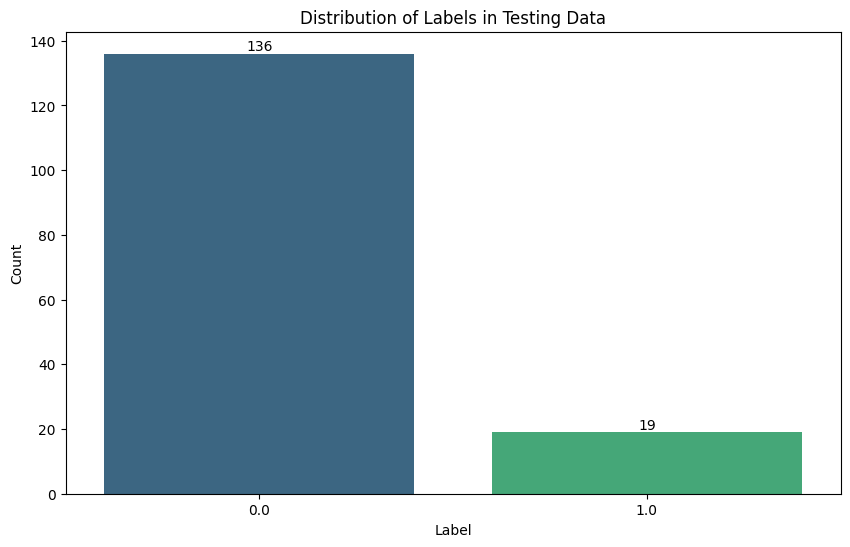

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the train labels into a DataFrame
train_df = pd.DataFrame({'label': test_labels})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='label', palette='viridis')  # Adjust palette as desired
plt.title('Distribution of Labels in Testing Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Annotate each bar with its count value
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

0.0


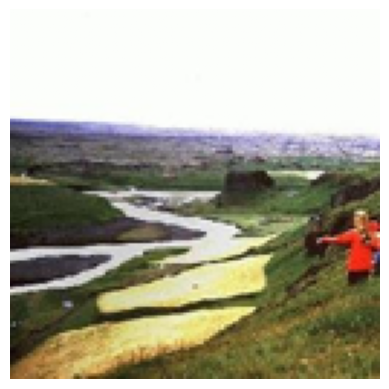

In [53]:
import matplotlib.pyplot as plt
plt.axis("off")
value = 112
plt.imshow(train_images[value])
print(train_labels[value])

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model for computer vision
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Adjust the number of output classes as needed
])

# Compile the model
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       3,211,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,267,713 (12.47 MB)

 Trainable params: 3,267,713 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
cnn_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [56]:
cnn_tr = cnn_model.fit(train_images,train_labels, validation_data = (test_images,test_labels), epochs = 20)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8585 - loss: 0.4940 - val_accuracy: 0.8903 - val_loss: 0.2633
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8487 - loss: 0.3320 - val_accuracy: 0.8774 - val_loss: 0.2189
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9100 - loss: 0.2335 - val_accuracy: 0.9032 - val_loss: 0.2916
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9287 - loss: 0.1966 - val_accuracy: 0.9226 - val_loss: 0.1978
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9592 - loss: 0.1241 - val_accuracy: 0.9355 - val_loss: 0.2064
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9560 - loss: 0.1170 - val_accuracy: 0.8710 - val_loss: 0.3094
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9648 - loss: 0.1258 - val_accuracy: 0.9226 - val_loss: 0.2073
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9810 - loss: 0.0773 - val_accuracy: 0.9226 - val_loss:

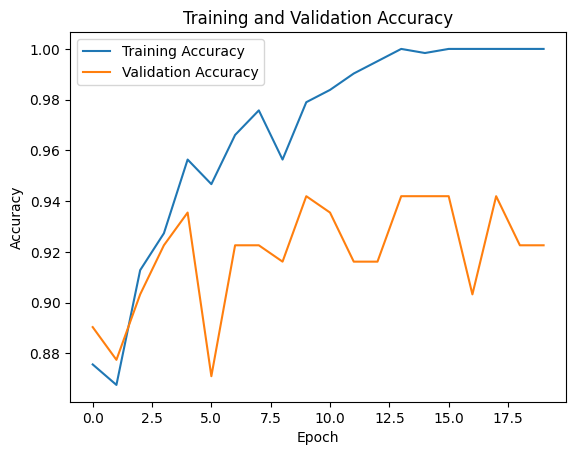

In [57]:
plt.plot(cnn_tr.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_tr.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

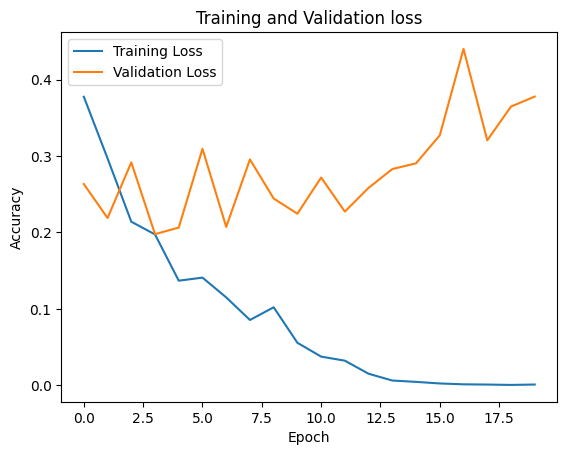

In [58]:
plt.plot(cnn_tr.history['loss'], label='Training Loss')
plt.plot(cnn_tr.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
acc = cnn_tr.history['accuracy']
print(acc)
a = len(acc)
cnn_acc= acc[a-1]

print(cnn_acc)

[0.8756058216094971, 0.8675282597541809, 0.9127625226974487, 0.9273021221160889, 0.9563812613487244, 0.9466882348060608, 0.9660742878913879, 0.9757673740386963, 0.9563812613487244, 0.9789983630180359, 0.9838449358940125, 0.9903069734573364, 0.9951534867286682, 1.0, 0.9983844757080078, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


train_images, test_images, train_labels, test_labels = train_test_split(combined_array, combined_labels, test_size=0.4)

y_pred = cnn_model.predict(test_images)

y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(test_labels, y_pred_classes)
from sklearn.metrics import classification_report

print("Confusion Matrix:")
print(cm)


report = classification_report(test_labels, y_pred_classes,zero_division = 1)


print("\nClassification Report:")
print(report)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 394ms/step
Confusion Matrix:
[[261   0]
 [ 49   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       261
         1.0       1.00      0.00      0.00        49

    accuracy                           0.84       310
   macro avg       0.92      0.50      0.46       310
weighted avg       0.87      0.84      0.77       310



In [ ]:
cnn_test = 0.84


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Not Fire
[[1.2831968e-07]]


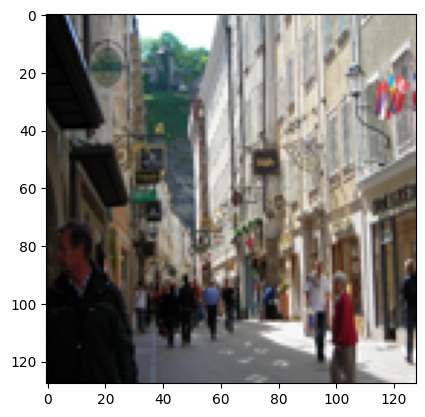

In [65]:
v = 2
p = cnn_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Not Fire
[[7.732964e-11]]


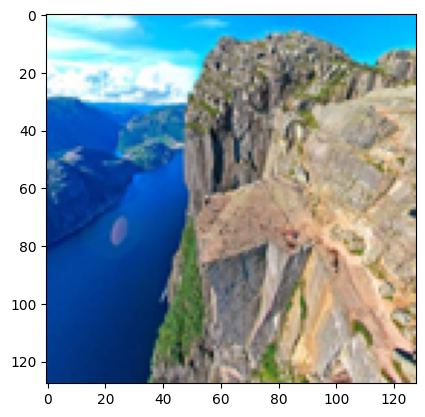

In [66]:
v = 152
p = cnn_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

In [67]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model (excluding the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (fire or non-fire)

# Create the final model
vgg_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
vgg_model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [68]:
vgg_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [69]:
vgg_tr = vgg_model.fit(train_images,train_labels, validation_data = (test_images,test_labels), epochs = 10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 190s 13s/step - accuracy: 0.6869 - loss: 1.3622 - val_accuracy: 0.9484 - val_loss: 0.2929
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 172s 11s/step - accuracy: 0.9163 - loss: 0.2265 - val_accuracy: 0.9226 - val_loss: 0.2193
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 201s 11s/step - accuracy: 0.9387 - loss: 0.1722 - val_accuracy: 0.9258 - val_loss: 0.1773
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 205s 11s/step - accuracy: 0.9690 - loss: 0.0969 - val_accuracy: 0.9323 - val_loss: 0.1649
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 202s 11s/step - accuracy: 0.9799 - loss: 0.0578 - val_accuracy: 0.9484 - val_loss: 0.1436
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 196s 11s/step - accuracy: 0.9939 - loss: 0.0414 - val_accuracy: 0.9548 - val_loss: 0.1308
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 202s 11s/step - accuracy: 0.9982 - loss: 0.0357 - val_accuracy: 0.9290 - val_loss: 0.1557
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 222s 12s/step - accuracy: 0.9978 - loss: 0.0237 - val_accuracy: 0.

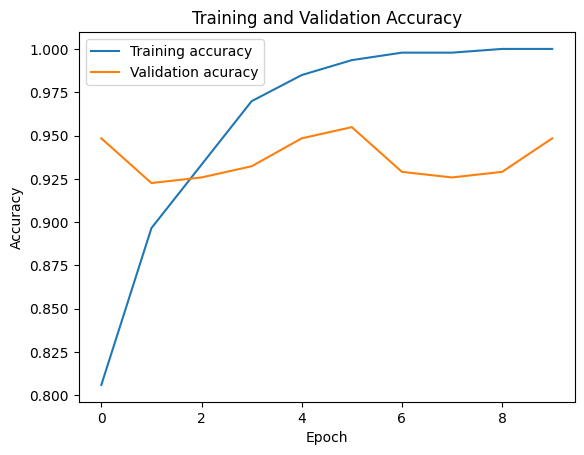

In [70]:
plt.plot(vgg_tr.history['accuracy'], label='Training accuracy')
plt.plot(vgg_tr.history['val_accuracy'], label='Validation acuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

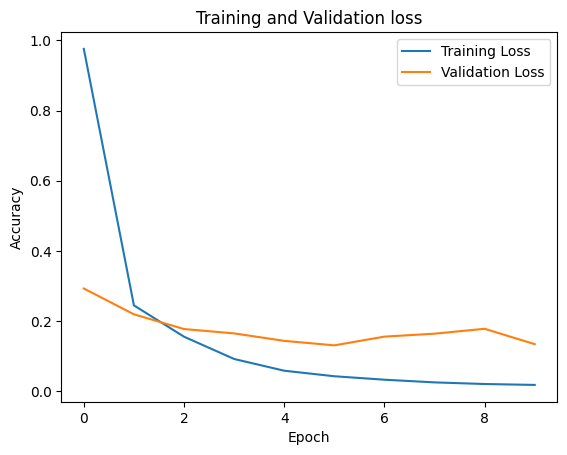

In [71]:
plt.plot(vgg_tr.history['loss'], label='Training Loss')
plt.plot(vgg_tr.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
Not Fire
[[0.00158035]]


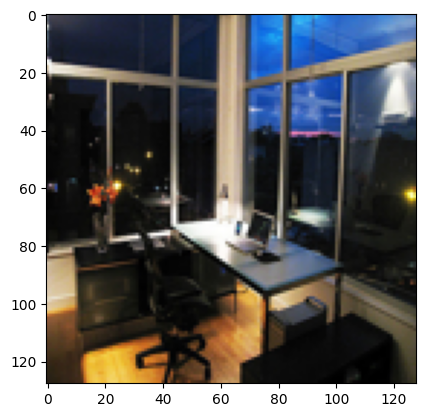

In [72]:
v = 85
p = vgg_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Not Fire
[[0.01379069]]


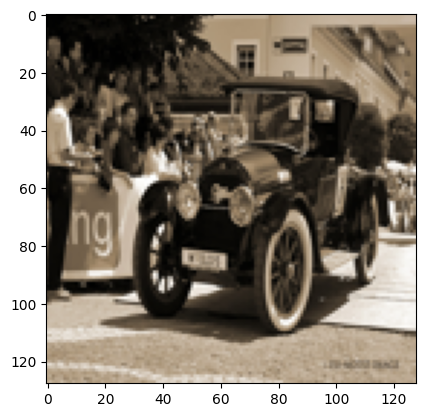

In [73]:
v = 102
p = vgg_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Fire
[[0.8554963]]


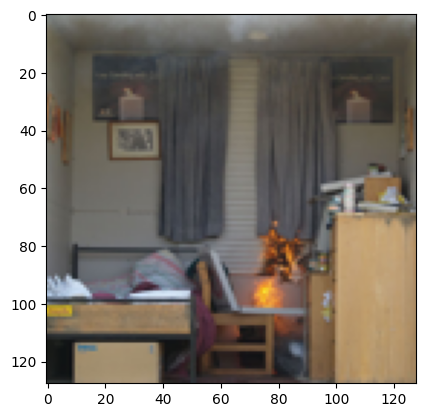

In [79]:
v = 302
p = vgg_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

In [80]:
acc = vgg_tr.history['accuracy']
print(acc)
a = len(acc)
vgg_acc= acc[a-1]

print(vgg_acc)


[0.806034505367279, 0.8965517282485962, 0.9331896305084229, 0.9698275923728943, 0.9849137663841248, 0.993534505367279, 0.9978448152542114, 0.9978448152542114, 1.0, 1.0]
1.0


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


train_images, test_images, train_labels, test_labels = train_test_split(combined_array, combined_labels, test_size=0.4)

y_pred = vgg_model.predict(test_images)

y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(test_labels, y_pred_classes)
from sklearn.metrics import classification_report

print("Confusion Matrix:")
print(cm)


report = classification_report(test_labels, y_pred_classes,zero_division = 1)


print("\nClassification Report:")
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 6s/step
Confusion Matrix:
[[258   0]
 [ 52   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       258
         1.0       1.00      0.00      0.00        52

    accuracy                           0.83       310
   macro avg       0.92      0.50      0.45       310
weighted avg       0.86      0.83      0.76       310



In [83]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the pre-trained ResNet-50 model (excluding the top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (fire or non-fire)

# Create the final ResNet-50 model
resnet_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
resnet_model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 31,976,833 (121.98 MB)

 Trainable params: 8,389,121 (32.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [84]:
resnet_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [85]:
r = resnet_model.fit(train_images,train_labels, validation_data = (test_images,test_labels), epochs = 10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.7736 - loss: 0.8807 - val_accuracy: 0.8323 - val_loss: 0.8112
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.8828 - loss: 0.5204 - val_accuracy: 0.8323 - val_loss: 0.4200
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8787 - loss: 0.3574 - val_accuracy: 0.8323 - val_loss: 0.4094
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8585 - loss: 0.3576 - val_accuracy: 0.8323 - val_loss: 0.4425
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8775 - loss: 0.3329 - val_accuracy: 0.8323 - val_loss: 0.4040
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9025 - loss: 0.2601 - val_accuracy: 0.8323 - val_loss: 0.4234
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.8858 - loss: 0.3061 - val_accuracy: 0.8323 - val_loss: 0.3709
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.8832 - loss: 0.2775 - val_accuracy: 0.8323 - val_loss

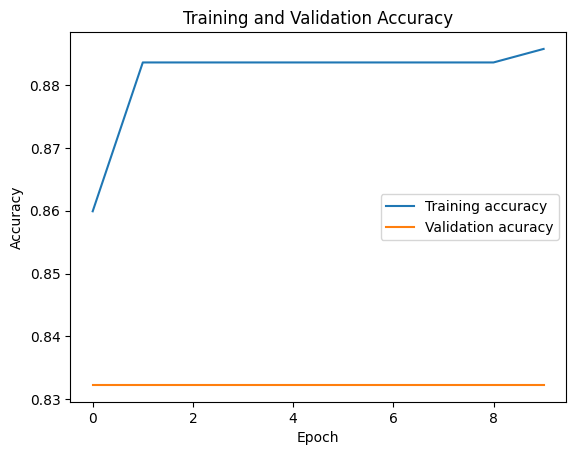

In [104]:
plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label='Validation acuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

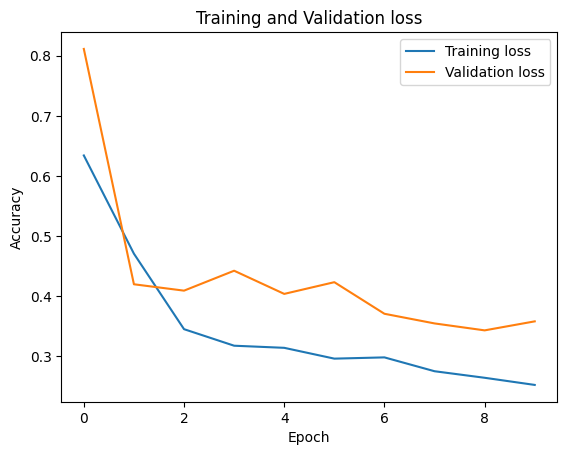

In [105]:
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
Not Fire
[[0.32221523]]


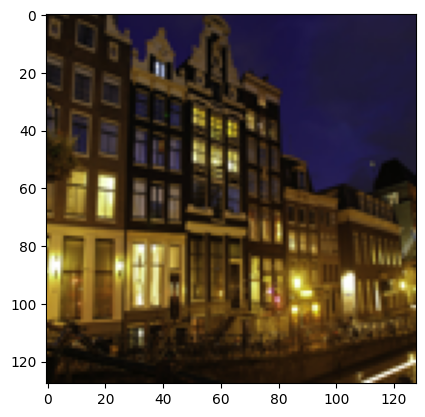

In [110]:
v = 56
p = resnet_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Not Fire
[[0.4800524]]


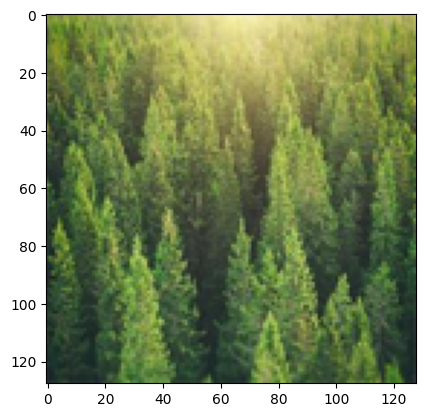

In [111]:
v = 154
p = resnet_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Not Fire
[[0.11174247]]


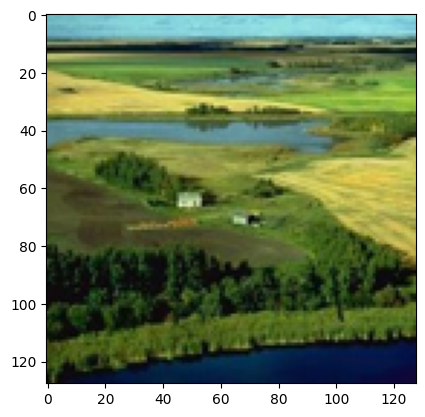

In [112]:
v = 74
p = resnet_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

In [137]:
acc = r.history['accuracy']
print(acc)
a = len(acc)
resnet_acc= acc[a-1]

print(resnet_acc)

[0.8599137663841248, 0.8836206793785095, 0.8836206793785095, 0.8836206793785095, 0.8836206793785095, 0.8836206793785095, 0.8836206793785095, 0.8836206793785095, 0.8836206793785095, 0.8857758641242981]
0.8857758641242981


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


train_images, test_images, train_labels, test_labels = train_test_split(combined_array, combined_labels, test_size=0.4)

y_pred = resnet_model.predict(test_images)

y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(test_labels, y_pred_classes)
from sklearn.metrics import classification_report

print("Confusion Matrix:")
print(cm)


report = classification_report(test_labels, y_pred_classes,zero_division = 1)


print("\nClassification Report:")
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Confusion Matrix:
[[263   0]
 [ 47   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       263
         1.0       1.00      0.00      0.00        47

    accuracy                           0.85       310
   macro avg       0.92      0.50      0.46       310
weighted avg       0.87      0.85      0.78       310



In [115]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained InceptionV3 model (excluding the top classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128,128, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (fire or non-fire)

# Create the final InceptionV3 model
inception_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
inception_model.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_103 (Conv2D)       │ (None, 63, 63, 32)     │            864 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 63, 63, 32)     │             96 │ conv2d_103[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 63, 63, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_104 (Conv2D)       │ (None, 61, 61, 32)     │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 61, 61, 32)     │             96 │ conv2d_104[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 61, 61, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_105 (Conv2D)       │ (None, 61, 61, 64)     │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 61, 61, 64)     │            192 │ conv2d_105[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 61, 61, 64)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 30, 30, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_106 (Conv2D)       │ (None, 30, 30, 80)     │          5,120 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 30, 30, 80)     │            240 │ conv2d_106[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 30, 30, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_107 (Conv2D)  

 Total params: 22,327,585 (85.17 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [116]:
inception_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [119]:
i = inception_model.fit(train_images,train_labels, validation_data = (test_images,test_labels), epochs = 10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 1.0000 - loss: 5.1769e-04 - val_accuracy: 0.9516 - val_loss: 0.2118
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 1.0000 - loss: 5.2843e-04 - val_accuracy: 0.9516 - val_loss: 0.2141
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 4.6406e-04 - val_accuracy: 0.9516 - val_loss: 0.2206
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 1.0000 - loss: 4.1850e-04 - val_accuracy: 0.9516 - val_loss: 0.2186
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 1.0000 - loss: 3.5651e-04 - val_accuracy: 0.9516 - val_loss: 0.2250
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 1.0000 - loss: 3.2453e-04 - val_accuracy: 0.9516 - val_loss: 0.2228
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 1.0000 - loss: 4.1476e-04 - val_accuracy: 0.9516 - val_loss: 0.2247
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 1.0000 - loss: 3.5675e-04 - 

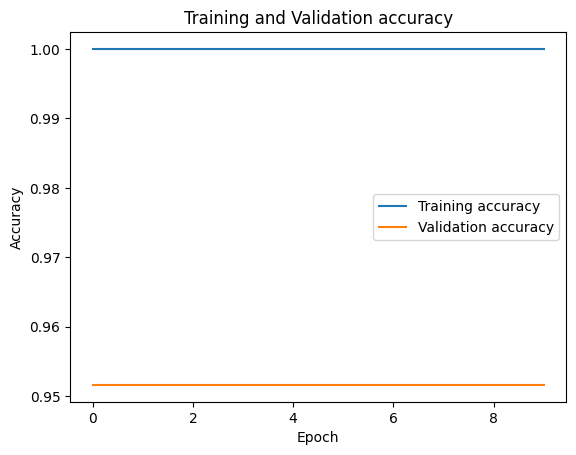

In [120]:
plt.plot(i.history['accuracy'], label='Training accuracy')
plt.plot(i.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

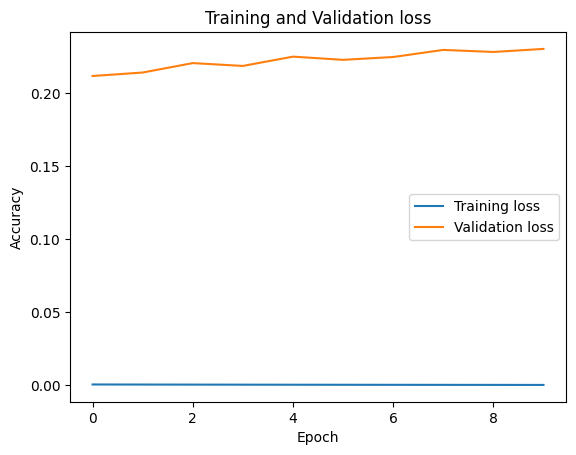

In [121]:
plt.plot(i.history['loss'], label='Training loss')
plt.plot(i.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Not Fire
[[1.3530379e-06]]


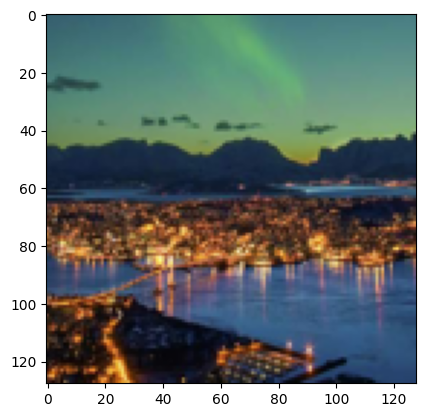

In [122]:
v = 34
p = inception_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Not Fire
[[6.917359e-08]]


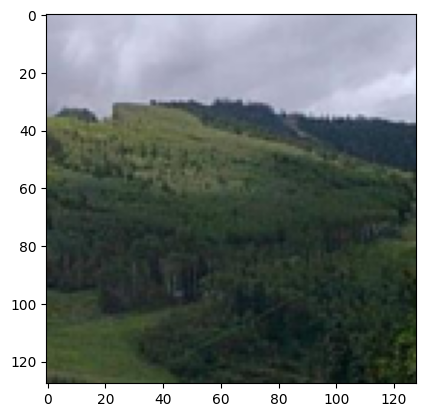

In [123]:
v = 155
p = inception_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Not Fire
[[1.5531275e-07]]


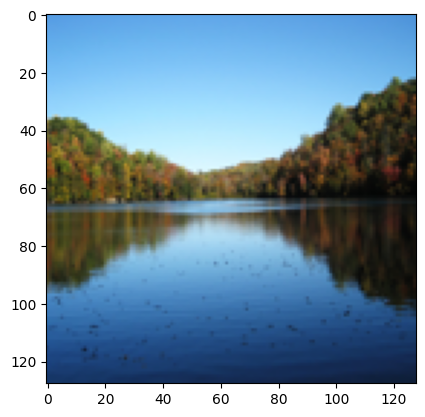

In [124]:
v = 2
p = inception_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

In [144]:
inception_acc =  1.0

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


train_images, test_images, train_labels, test_labels = train_test_split(combined_array, combined_labels, test_size=0.4)

y_pred = inception_model.predict(test_images)

y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(test_labels, y_pred_classes)
from sklearn.metrics import classification_report

print("Confusion Matrix:")
print(cm)


report = classification_report(test_labels, y_pred_classes,zero_division = 1)


print("\nClassification Report:")
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
Confusion Matrix:
[[263   0]
 [ 47   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       263
         1.0       1.00      0.00      0.00        47

    accuracy                           0.85       310
   macro avg       0.92      0.50      0.46       310
weighted avg       0.87      0.85      0.78       310



In [127]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained MobileNetV2 model (excluding the top classification layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (fire or non-fire)

# Create the final MobileNetV2 model
mobile_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
mobile_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
mobile_model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [128]:
mobile_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [129]:
m = mobile_model.fit(train_images,train_labels, validation_data = (test_images,test_labels), epochs = 20)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 870ms/step - accuracy: 0.7816 - loss: 0.6852 - val_accuracy: 0.9387 - val_loss: 0.1735
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 706ms/step - accuracy: 0.9559 - loss: 0.1044 - val_accuracy: 0.9387 - val_loss: 0.1743
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 724ms/step - accuracy: 0.9936 - loss: 0.0357 - val_accuracy: 0.9516 - val_loss: 0.1629
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 717ms/step - accuracy: 1.0000 - loss: 0.0158 - val_accuracy: 0.9484 - val_loss: 0.1690
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 752ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9484 - val_loss: 0.1758
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 733ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9516 - val_loss: 0.1828
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 723ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9484 - val_loss: 0.1868
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 679ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accu

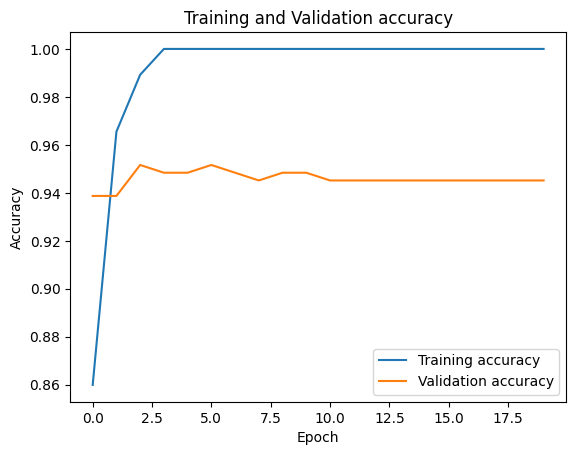

In [130]:
plt.plot(m.history['accuracy'], label='Training accuracy')
plt.plot(m.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

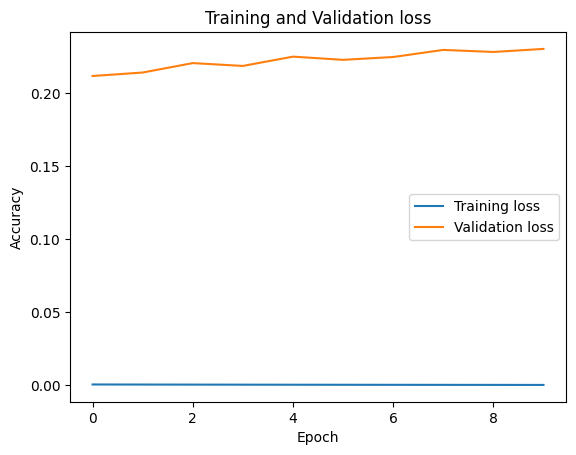

In [132]:
plt.plot(i.history['loss'], label='Training loss')
plt.plot(i.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Not Fire
[[0.0003614]]


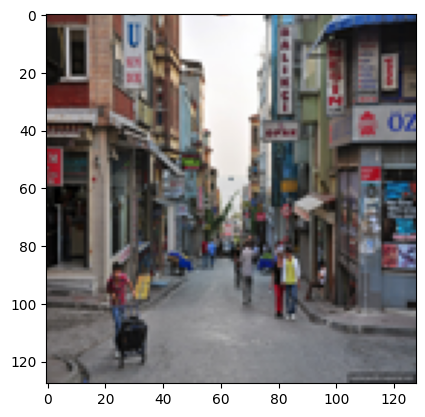

In [133]:
v = 157
p = mobile_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Not Fire
[[7.995728e-07]]


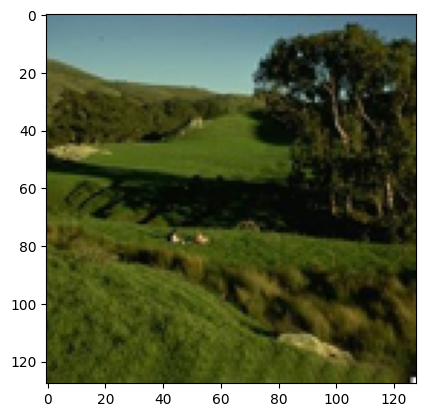

In [134]:
v = 2
p = mobile_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Not Fire
[[2.8091223e-05]]


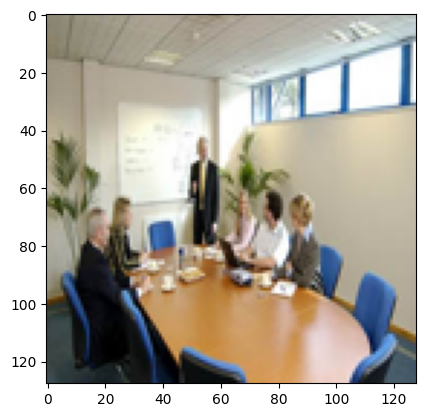

In [135]:
v = 56
p = mobile_model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)

In [ ]:
acc = m.history['accuracy']
print(acc)
a = len(acc)
mobilenet_acc= acc[a-1]

print(mobilenet_acc)

[0.9136179089546204, 0.994918704032898, 0.9979674816131592, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


train_images, test_images, train_labels, test_labels = train_test_split(combined_array, combined_labels, test_size=0.4)

y_pred = mobile_model.predict(test_images)

y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(test_labels, y_pred_classes)
from sklearn.metrics import classification_report

print("Confusion Matrix:")
print(cm)


report = classification_report(test_labels, y_pred_classes,zero_division = 1)


print("\nClassification Report:")
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 865ms/step
Confusion Matrix:
[[267   0]
 [ 43   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       267
         1.0       1.00      0.00      0.00        43

    accuracy                           0.86       310
   macro avg       0.93      0.50      0.46       310
weighted avg       0.88      0.86      0.80       310



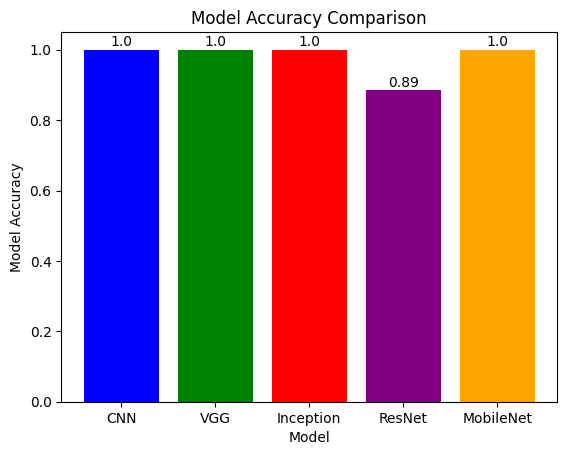

In [139]:
import matplotlib.pyplot as plt
import numpy as np


cnn_acc = cnn_acc
vgg_acc = vgg_acc
inception_acc = inception_acc
resnet_acc = resnet_acc
mobilenet_acc = mobilenet_acc

x = np.array(['CNN', 'VGG', 'Inception', 'ResNet', 'MobileNet'])
y = np.array([cnn_acc, vgg_acc, inception_acc, resnet_acc, mobilenet_acc])

# Define HTML color names for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']

bar = plt.bar(x, y, color=colors)
plt.xlabel('Model')
plt.ylabel('Model Accuracy')
plt.title('Model Accuracy Comparison')

# Adding text labels
for i, val in enumerate(y):
    plt.text(i, val + 0.01, round(val, 2), ha='center')

plt.show()


In [168]:
import pandas as pd

print(" performance metrics for 0")

model = {
    'CNN': "CNN",
    'VGG16': "VGG16",
    'RESNET50': "RESNET50",
    'INCEPTIONV5' : "INCEPTIONV5",
    'MOBILENETV3' : "MOBILENETV3"
}

accuracy_rates_training = {
    'CNN': 1.0,
    'VGG16': 1.0,
    'RESNET50': 1.0,
    'INCEPTIONV5' : 0.89,
    'MOBILENETV3' : 1.0
}
accuracy_rates_testing = {
    'CNN': 0.84,
    'VGG16': 0.83,
    'RESNET50': 0.85,
    'INCEPTIONV5' : 0.85,
    'MOBILENETV3' : 0.86
}

precision = {
   'CNN': 0.84,
    'VGG16': 0.83,
    'RESNET50': 0.85,
    'INCEPTIONV5' : 0.85,
    'MOBILENETV3' : 0.86
}

recall = {
     'CNN': 1.00,
    'VGG16': 1.00,
    'RESNET50': 1.00,
    'INCEPTIONV5' : 1.00,
    'MOBILENETV3' : 1.00
}

f1_score = {
     'CNN': 0.91,
    'VGG16': 0.91,
    'RESNET50': 0.92,
    'INCEPTIONV5' : 0.92,
    'MOBILENETV3' : 0.93
}

support = {
     'CNN': 261,
    'VGG16': 258,
    'RESNET50': 263,
    'INCEPTIONV5' : 263,
    'MOBILENETV3' : 267
}

# Create a DataFrame
df_comparison = pd.DataFrame({
    'Model' : list(model.keys()),
    'Accuracy in training data': list(accuracy_rates_training.values()),
    'Accuracy in test data': list(accuracy_rates_testing.values()),
    'Precision': list(precision.values()),
    'Recall': list(recall.values()),
    'F1-Score': list(f1_score.values()),
    'Support' : list(support.values())
})

# Set 'Model' column as index (optional)
df_comparison.set_index('Model', inplace=True)

df_comparison


 performance metrics for 0


Accuracy in training data  Accuracy in test data  Precision  \
Model                                                                      
CNN                               1.00                   0.84       0.84   
VGG16                             1.00                   0.83       0.83   
RESNET50                          1.00                   0.85       0.85   
INCEPTIONV5                       0.89                   0.85       0.85   
MOBILENETV3                       1.00                   0.86       0.86   

             Recall  F1-Score  Support  
Model                                   
CNN             1.0      0.91      261  
VGG16           1.0      0.91      258  
RESNET50        1.0      0.92      263  
INCEPTIONV5     1.0      0.92      263  
MOBILENETV3     1.0      0.93      267

In [1]:
import pandas as pd

print(" performance metrics for 1")

model = {
    'CNN': "CNN",
    'VGG16': "VGG16",
    'RESNET50': "RESNET50",
    'INCEPTIONV5' : "INCEPTIONV5",
    'MOBILENETV3' : "MOBILENETV3"
}

accuracy_rates_training = {
    'CNN': 1.0,
    'VGG16': 1.0,
    'RESNET50': 1.0,
    'INCEPTIONV5' : 0.89,
    'MOBILENETV3' : 1.0
}

accuracy_rates_testing = {
    'CNN': 0.84,
    'VGG16': 0.83,
    'RESNET50': 0.85,
    'INCEPTIONV5' : 0.85,
    'MOBILENETV3' : 0.86
}

precision = {
   'CNN': 1.00,
    'VGG16': 1.00,
    'RESNET50': 1.00,
    'INCEPTIONV5' : 1.00,
    'MOBILENETV3' : 1.00
}

recall = {
     'CNN': 0.00,
    'VGG16': 0.00,
    'RESNET50': 0.00,
    'INCEPTIONV5' : 0.00,
    'MOBILENETV3' : 0.00
}

f1_score = {
     'CNN': 0.00,
    'VGG16': 0.00,
    'RESNET50': 0.00,
    'INCEPTIONV5' : 0.00,
    'MOBILENETV3' : 0.00
}

support = {
     'CNN': 49,
    'VGG16': 52,
    'RESNET50': 47,
    'INCEPTIONV5' : 47,
    'MOBILENETV3' : 43
}

# Create a DataFrame
df_comparison = pd.DataFrame({
    'Model' : list(model.keys()),
    'Accuracy in training data': list(accuracy_rates_training.values()),
    'Accuracy in test data': list(accuracy_rates_testing.values()),
    'Precision': list(precision.values()),
    'Recall': list(recall.values()),
    'F1-Score': list(f1_score.values()),
    'Support' : list(support.values())
})

# Set 'Model' column as index (optional)
df_comparison.set_index('Model', inplace=True)

df_comparison

 performance metrics for 1


Accuracy in training data  Accuracy in test data  Precision  \
Model                                                                      
CNN                               1.00                   0.84        1.0   
VGG16                             1.00                   0.83        1.0   
RESNET50                          1.00                   0.85        1.0   
INCEPTIONV5                       0.89                   0.85        1.0   
MOBILENETV3                       1.00                   0.86        1.0   

             Recall  F1-Score  Support  
Model                                   
CNN             0.0       0.0       49  
VGG16           0.0       0.0       52  
RESNET50        0.0       0.0       47  
INCEPTIONV5     0.0       0.0       47  
MOBILENETV3     0.0       0.0       43

In [156]:
!pip install opencv-python
!pip install pillow

In [157]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
from PIL import Image

In [158]:
folder_path = "/content/drive/MyDrive/sample"


In [159]:
if not os.path.isfile('/content/WhatsApp Image 2024-03-18 at 11.20.11 PM.jpeg') and not os.path.isdir(folder_path):
    print("Invalid path provided.")
    exit()

In [160]:
if os.path.isfile('/content/WhatsApp Image 2024-03-18 at 11.20.11 PM.jpeg'):
    # Load single image
    image = cv2.imread(image_path)
elif os.path.isdir(folder_path):
    # Load images from folder
    images = jpg_to_array(folder_path)

In [161]:
!pip install google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.9 MB/s eta 0:00:00


In [162]:
from google.colab.patches import cv2_imshow

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Fire


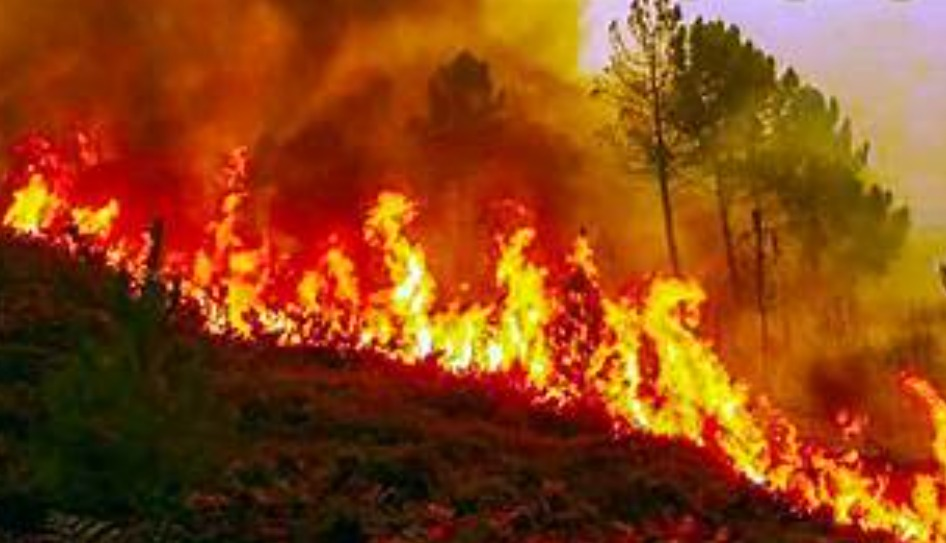

In [163]:
import cv2
import numpy as np
import os
from PIL import Image
!pip install tensorflow
import tensorflow as tf

image_path = "/content/drive/MyDrive/sample/WhatsApp Image 2024-03-19 at 12.00.56 AM.jpeg"  # For single image
folder_path = "/content/drive/MyDrive/sample/"     # For folder of images

def preprocess_image(image, target_size=(128, 128)):
    image = Image.fromarray(image)
    resized_image = image.resize(target_size)
    image_array = np.array(resized_image)
    if image_array.dtype == np.uint8:
        image_array = image_array.astype('float32') / 255.0
    return image_array

if os.path.isfile(image_path):
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image)
    p = inception_model.predict(np.expand_dims(preprocessed_image, axis=0))
    if p.any() >= 0.5:
      print("Fire")
    else:
      print("Not Fire")
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
elif os.path.isdir(folder_path):
    # Load images from folder
    images = jpg_to_array(folder_path)
    predictions = inception_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Fire


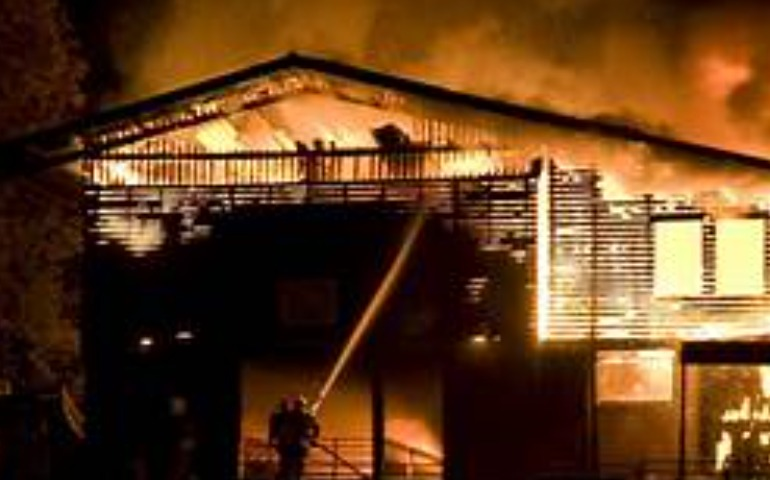

In [164]:
import cv2
import numpy as np
import os
image_path = "/content/drive/MyDrive/sample/WhatsApp Image 2024-03-18 at 11.20.11 PM.jpeg"  # For single image
folder_path = "/content/drive/MyDrive/sample/"     # For folder of images

if os.path.isfile(image_path):
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image)
    p = inception_model.predict(np.expand_dims(preprocessed_image, axis=0))
    if p.any() >= 0.5:
      print("Fire")
    else:
      print("Not Fire")
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
elif os.path.isdir(folder_path):
    # Load images from folder
    images = jpg_to_array(folder_path)
    predictions = inception_model.predict(images)

    for i, p in enumerate(predictions):
        if p >= 0.5:
            print(f"Image {i}: Fire")
        else:
            print(f"Image {i}: Not Fire")
else:
    print("Invalid path provided.")
